In [7]:
import pandas as pd
import matplotlib
import numpy as np

from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
# from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from scipy.stats import norm
# import rpy2
import statsmodels.api as sm
#%pip install rpy2
from scipy import stats as st
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

pd.set_option('display.max_rows', None)

print("Setup Complete")

Setup Complete


You work for the OilyGiant mining company. Your task is to find the best place for a new well. Steps to choose the location:

- Collect the oil well parameters in the selected region: oil quality and volume of reserves;

- Build a model for predicting the volume of reserves in the new wells;

- Pick the oil wells with the highest estimated values;

- Pick the region with the highest total profit for the selected oil wells.

In [8]:
try:
    df_0 = pd.read_csv('geo_data_0.csv')
    df_1 = pd.read_csv('geo_data_1.csv')
    df_2 = pd.read_csv('geo_data_2.csv')
    
except:
    df_0 = pd.read_csv('/datasets/geo_data_0.csv')
    df_1 = pd.read_csv('/datasets/geo_data_1.csv')
    df_2 = pd.read_csv('/datasets/geo_data_2.csv')

# Explore the data

In [9]:
df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [10]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
df_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [12]:
df_0.duplicated().sum()

0

In [13]:
df_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [14]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [15]:
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [16]:
df_1.duplicated().sum()

0

In [17]:
df_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [18]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [19]:
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [20]:
df_2.duplicated().sum()

0

## Conclusion:
At some point, we need to drop ID from all dfs.

## What is in those wells?

In [21]:
def is_there_empty_wells(df, target_name):
    empty = df[df[target_name] == 0][target_name].count()
    percent = empty / df.shape[0]
    print('Number of null values is', empty)
    print('Percentage of null values is', percent)

In [22]:
is_there_empty_wells(df_0, 'product')

Number of null values is 1
Percentage of null values is 1e-05


In [23]:
is_there_empty_wells(df_1, 'product')

Number of null values is 8235
Percentage of null values is 0.08235


In [24]:
is_there_empty_wells(df_2, 'product')

Number of null values is 1
Percentage of null values is 1e-05


## Conclusion:
df_1 has a lot of empty wells.  I will test all models for df_1 with those and without the empty wells.

## Visualize the distribution of wells and volume

In [25]:
def oil_hist(df, bins, xlim_max, ylim_max):
    plt.figure(figsize=[12,9])

    plt.hist(df, bins=bins)

    plt.xlim([0,xlim_max])
    plt.ylim([0,ylim_max])

    plt.xlabel("Volume of oil per well")
    plt.ylabel("Number of wells")

    plt.title("Distribution by well volume")
    plt.show()

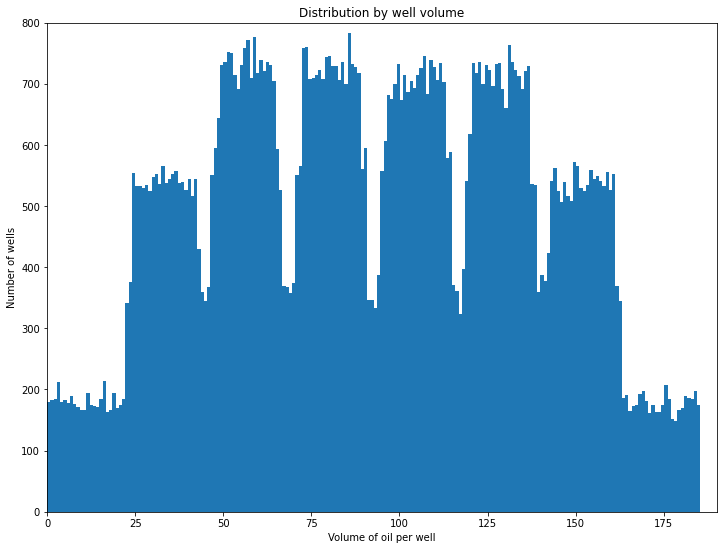

In [26]:
oil_hist(df_0['product'], 200, 190, 800)

## Conclusion:
Lots of wells with a cumulative multimodal distribution for region 0

In [27]:
df_1_partial = df_1.copy()
df_1_partial= df_1_partial.mask(df_1_partial.eq(0)).dropna(how='all', axis=1)
df_1_no_empty = df_1_partial.dropna()

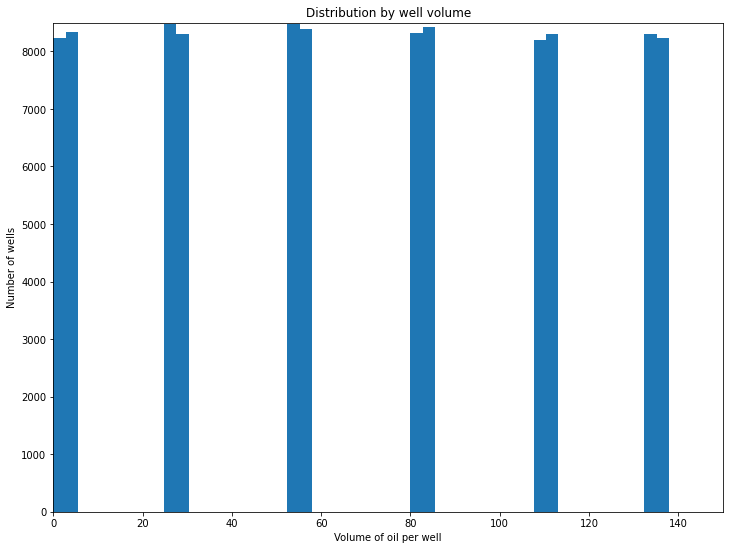

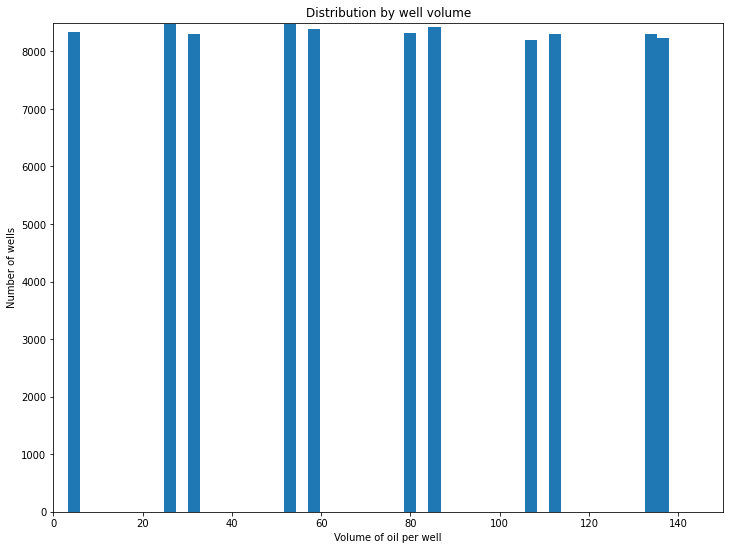

In [28]:
oil_hist(df_1['product'], 50, 150, 8500)
oil_hist(df_1_no_empty['product'], 50, 150, 8500)

## Conclusion:
df_1 has much less wells in general, but they have more oil. df_1_no_empty has even less wells.  But it looks like the most promising wells in df_1 and df_no_empty remains the same.

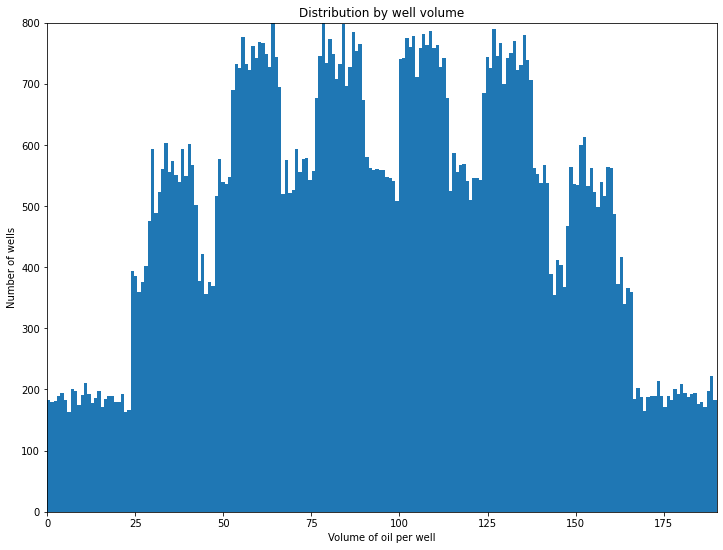

In [29]:
oil_hist(df_2['product'], 200, 190, 800)

## Conclusion:
like df_0, df_2 has many wells and their cumulative distribution is multimodel

# Understanding the relationship between variables

In [30]:
def OLS(df):
    X = df.drop(['id','product'], axis=1)
    y = df['product']
    X = sm.add_constant(X)
    result = sm.OLS(y, X).fit()
    print(result.summary())

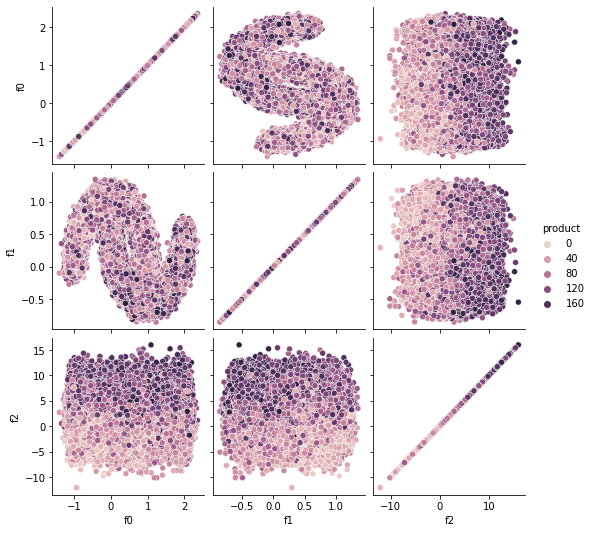

In [31]:
sns.pairplot(df_0, diag_kind = None, hue='product');

## Conclusion
As f2 increases, the reserves of df_0 increase

In [32]:
OLS_0  = OLS(df_0)

                            OLS Regression Results                            
Dep. Variable:                product   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        22:17:59   Log-Likelihood:            -5.0484e+05
No. Observations:              100000   AIC:                         1.010e+06
Df Residuals:                   99996   BIC:                         1.010e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.6114      0.193    402.165      0.0

## Conclusion:
There is a positive and statistically significant relationship between f0, f2 and and the output of df_0 and a negative and statistically significant relationship relationship between f1 and the output.

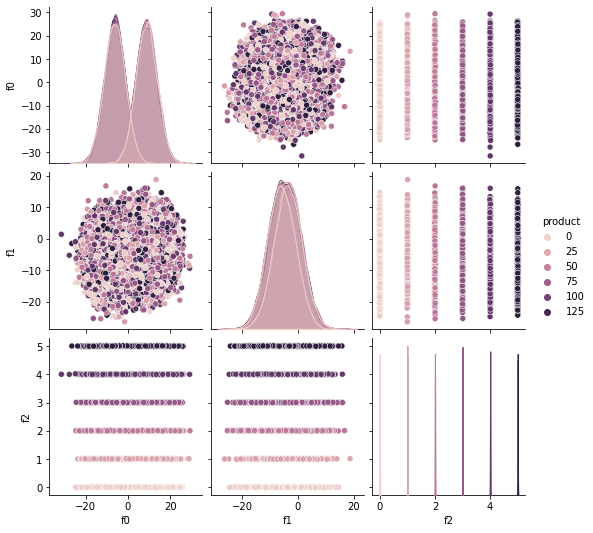

In [33]:
sns.pairplot(df_1,  hue='product');

## Conclusion:
For df_1 also, as f2 increases output increases.

In [34]:
OLS_1  = OLS(df_1)

                            OLS Regression Results                            
Dep. Variable:                product   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.872e+07
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        22:18:28   Log-Likelihood:            -1.3028e+05
No. Observations:              100000   AIC:                         2.606e+05
Df Residuals:                   99996   BIC:                         2.606e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6547      0.006    289.949      0.0

## Conclusion:
There is a positive and statistically significant relationship between f2  and the output of df_1 and a negative almost insignificant but statistically significant relationship relationship between f1 and f0 and the output.  But this data is problematic because the R2 of this linear model is 1.

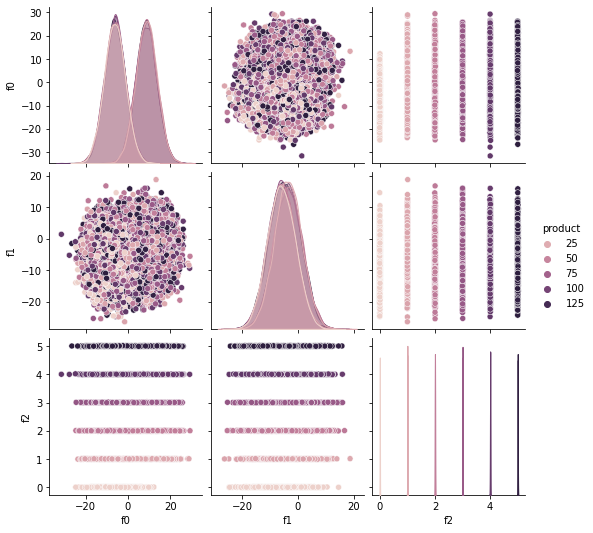

In [35]:
sns.pairplot(df_1_no_empty,  hue='product');

## Conclusion

In [36]:
OLS_1_no_empty  = OLS(df_1_no_empty)

                            OLS Regression Results                            
Dep. Variable:                product   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.140e+07
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        22:18:54   Log-Likelihood:            -1.1920e+05
No. Observations:               91765   AIC:                         2.384e+05
Df Residuals:                   91761   BIC:                         2.384e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8250      0.006    281.132      0.0

In [37]:
df_1_partial = df_1.copy()
df_1_inc = df_1_partial.drop(['f1'], axis =1)

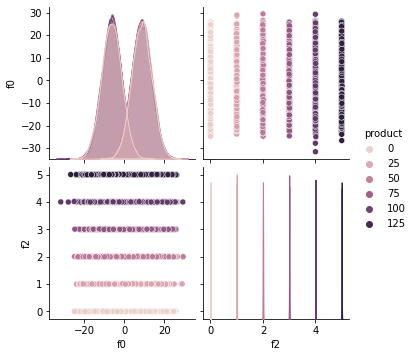

In [38]:
sns.pairplot(df_1_inc,  hue='product');

In [39]:
OLS_1_in  = OLS(df_1_inc)

                            OLS Regression Results                            
Dep. Variable:                product   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.311e+08
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        22:19:05   Log-Likelihood:            -1.3102e+05
No. Observations:              100000   AIC:                         2.621e+05
Df Residuals:                   99997   BIC:                         2.621e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7605      0.005    349.075      0.0

## Conclusion:
The R2 remains 1.  This means f2 totally explains output for this region. In other words, poorly made up data.

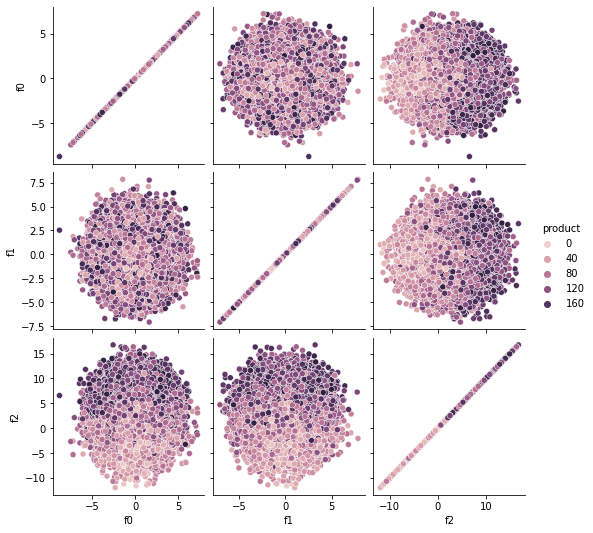

In [40]:
sns.pairplot(df_2, diag_kind = None, hue='product');

## Conclusion:
It looks like for region_2, as f2 increases, output increases.

In [41]:
OLS_2  = OLS(df_2)

                            OLS Regression Results                            
Dep. Variable:                product   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     8271.
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        22:19:50   Log-Likelihood:            -5.1092e+05
No. Observations:              100000   AIC:                         1.022e+06
Df Residuals:                   99996   BIC:                         1.022e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.6671      0.156    517.220      0.0

In this case, neither f0 nor f1 are important.

## Conclusion:
While f2 has a positive and statistically significant relationship to the output of region_2, f0 and f1 do not have a statistically significant relationship

In [42]:
df_2_partial = df_2.copy()
df_2_inc = df_2_partial.drop(['f0', 'f1'], axis =1)

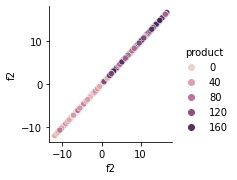

In [43]:
sns.pairplot(df_2_inc, diag_kind = None, hue='product');

In [44]:
OLS(df_2_inc)

                            OLS Regression Results                            
Dep. Variable:                product   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                 2.481e+04
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        22:19:58   Log-Likelihood:            -5.1092e+05
No. Observations:              100000   AIC:                         1.022e+06
Df Residuals:                   99998   BIC:                         1.022e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.6671      0.156    517.224      0.0

## Conclusion:
Dropping the variables does not change the R2

# Modeling

This function takes each of the df drops the features, splits into train and valid, create dummy, creates a pipline for scaling and modeling, create a grid with parameter for a best model search, fits the model, predicts, creates a dictionary with real and predicted values and calculates the rmse from the best model as a mean of the value in best.score_

In [45]:
def modeling(df):
    
    X = df.drop(['id','product'], axis=1)
    y = df['product']
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state=12345)
    
    dummy_model_mean = DummyRegressor(strategy="mean")
    dummy_model_mean.fit(X_train, y_train)
    y_pred_dum = dummy_model_mean.predict(X_valid)
    rmse_dum = round(mean_squared_error(y_valid,y_pred_dum)** 0.5,2)
    
    pipe_lm = Pipeline(steps = [
    ['scaler', ss()],
    ['lm', LinearRegression()]
    ])
   
    param_grid = {
    'lm':   [LinearRegression()], 
    "lm__fit_intercept": [True, False],
    'lm__normalize' :[True, False],
    'lm__copy_X':[True, False]
    }
  
    grid_pipe_lm = GridSearchCV(estimator=pipe_lm,
                           param_grid=param_grid,
                           scoring = 'neg_mean_squared_error', 
                           cv=RepeatedKFold(n_splits=5, n_repeats=3, random_state=12345),
                           n_jobs=-1)
    
    
    lm = grid_pipe_lm.fit(X_train, y_train)
    y_pred_lm = lm.predict(X_valid)
    data = {'real_product' : y_valid,
            'predicted_product' : y_pred_lm         
    }
    df_predict = pd.DataFrame(data, columns = ['real_product', 'predicted_product'])
    product_mean = round(df_predict['predicted_product'].mean(),2)
    product_sum = round(df_predict['predicted_product'].sum(),2)
    
    
    mse = lm.best_score_
    mse_lm = -mse
    rmse_lm = round((mse_lm ** 0.5),2)
  
    return  rmse_dum, lm, product_mean, product_sum, rmse_lm, df_predict

In [46]:
rmse_dum_0, lm_0, product_mean_0, product_sum_0, rmse_lm_0, df_predict_0= modeling(df_0)
rmse_dum_1, lm_1, product_mean_1, product_sum_1, rmse_lm_1, df_predict_1= modeling(df_1)
rmse_dum_2, lm_2, product_mean_2, product_sum_2, rmse_lm_2, df_predict_2= modeling(df_2)
rmse_dum_1_inc, lm_1_inc, product_mean_1_inc, product_sum_1_inc, rmse_lm_1_inc, df_predict_1_inc= modeling(df_1_inc)
rmse_dum_1_no_empty, lm_1_no_empty, product_mean_1_no_empty, product_sum_1_no_empty, rmse_lm_1_no_empty, df_predict_1_no_empty= modeling(df_1_no_empty)
rmse_dum_2_inc, lm_2_inc, product_mean_2_inc, product_sum_2_inc, rmse_lm_2_inc, df_predict_2_inc= modeling(df_2_inc)

WHY THIS MUCH WARNING, YET IT IS WORKING?  HOW CAN I AVOID THAT?

In [47]:
df_predict_2.head()

,real_product,predicted_product
71751,61.212375,93.599633
80493,41.850118,75.105159
2655,57.776581,90.066809
53233,100.053761,105.162375
91141,109.897122,115.303310


## Visualizing the results

In [48]:
models = pd.DataFrame({
    'Region': ['Region_0', 'Region_1', 'Region_1_inc', 'Region_1_no_empty','Region_2','Region_2_inc'],
    'Dummy RMSE': [rmse_dum_0, rmse_dum_1,  rmse_dum_1_inc, rmse_dum_1_no_empty, rmse_dum_2,rmse_dum_2_inc],
    'Model RMSE': [rmse_lm_0, rmse_lm_1,  rmse_lm_1_inc, rmse_lm_1_no_empty, rmse_lm_2,rmse_lm_2_inc],
    'Actual average': [round(df_0['product'].mean(),2), round(df_1['product'].mean(),2),  round(df_1_inc['product'].mean(),2), round(df_1_no_empty['product'].mean(),2), round(df_2['product'].mean(),2),round(df_2_inc['product'].mean(),2)],
    'Predicted average': [product_mean_0, product_mean_1,  product_mean_1_inc, product_mean_1_no_empty, product_mean_2, product_mean_2_inc, ]
})
models['% of error'] = round(models['Model RMSE'] / models['Predicted average'],2) * 100
models

,Region,Dummy RMSE,Model RMSE,Actual average,Predicted average,% of error
0,Region_0,44.29,37.73,92.50,92.59,41.0
1,Region_1,46.02,0.89,68.83,68.73,1.0
2,Region_1_inc,46.02,0.90,68.83,68.73,1.0
3,Region_1_no_empty,42.84,0.89,75.00,74.92,1.0
4,Region_2,44.90,40.07,95.00,94.97,42.0
5,Region_2_inc,44.90,40.06,95.00,94.97,42.0


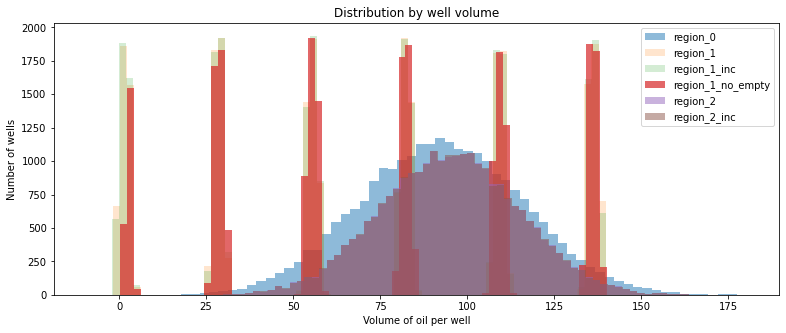

In [49]:
plt.figure(figsize=(13,5))
plt.hist(df_predict_0.predicted_product, alpha=0.5, bins=70, label='region_0')
plt.hist(df_predict_1.predicted_product, alpha=0.2, bins=70, label='region_1')
plt.hist(df_predict_1_inc.predicted_product, alpha=0.2, bins=70, label='region_1_inc')
plt.hist(df_predict_1_no_empty.predicted_product, alpha=0.7,bins=70, label='region_1_no_empty')
plt.hist(df_predict_2.predicted_product, alpha=0.5, bins=70, label='region_2')
plt.hist(df_predict_2_inc.predicted_product, alpha=0.5, bins=70, label='region_2_inc')
plt.legend(loc='upper right')
plt.title('Distribution by well volume')
plt.ylabel("Number of wells")
plt.xlabel('Volume of oil per well');

## Conclusion:
The actual average volume per region numbers are misleading.  Region 1, when we remove the empty wells has exponentially more wells with volumes higher than 130.  We also know from the EDA above that it has the lowest number of wells.  They may promise to be the most profitable though.

# Profit

This function calculates profit for based on a subsample of 500; it also choose the top 200

## Profit function for each region

In [50]:
def profit_calculator(df_predict):
    state = np.random.RandomState(12345)
    budget = 100000000

    profit_range = []
    for i in range(10000):
        subsample = df_predict.sample(n=500, replace=True, random_state=state).sort_values('predicted_product', ascending=False).iloc[0:200,].real_product
        revenue = subsample.sum() * 4500
        profit = revenue - budget
        profit_range.append(profit)
    return profit_range

In [51]:
profit_range_0          = pd.Series(profit_calculator(df_predict_0))
profit_range_1          = pd.Series(profit_calculator(df_predict_1))
profit_range_1_inc      = pd.Series(profit_calculator(df_predict_1_inc))
profit_range_1_no_empty = pd.Series(profit_calculator(df_predict_1_no_empty))
profit_range_2          = pd.Series(profit_calculator(df_predict_2))
profit_range_2_inc      = pd.Series(profit_calculator(df_predict_2_inc))

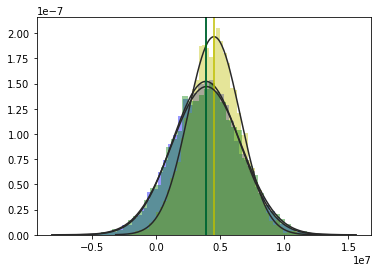

In [52]:
sns.distplot(profit_range_0, fit=norm, color="b", kde=False)
plt.axvline(x=profit_range_0.mean(), color='b')
sns.distplot(profit_range_1, fit=norm, color="y", kde=False)
plt.axvline(x=profit_range_1.mean(), color='y')
sns.distplot(profit_range_2, fit=norm, color="g", kde=False)
plt.axvline(x=profit_range_2.mean(), color='g');

### Conclusion:
The distribution of region 1 is tighter around the mean and its mean is higher.  This would probably be our region of choice.  Moreover, the mean of the profit distribution of df_1 is also 600,000 higher than each of the the other 2.  

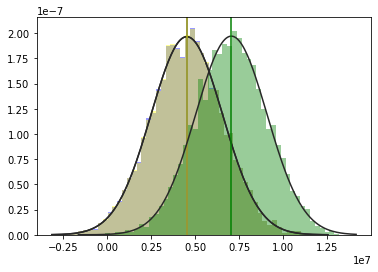

In [53]:
sns.distplot(profit_range_1, fit=norm, color="blue", kde=False)
plt.axvline(x=profit_range_1.mean(),
            color='b')
sns.distplot(profit_range_1_inc, fit=norm, color="yellow", kde=False)
plt.axvline(x=profit_range_1_inc.mean(),
            color='y')
sns.distplot(profit_range_1_no_empty, fit=norm, color="g", kde=False)
plt.axvline(x=profit_range_1_no_empty.mean(),
            color='g');

### Conclusion:
We see that removing the feature from df_1 shifted the mean only by 450 make any difference but removing the empty wells did shift the profitability distribution to the right by over 250,000

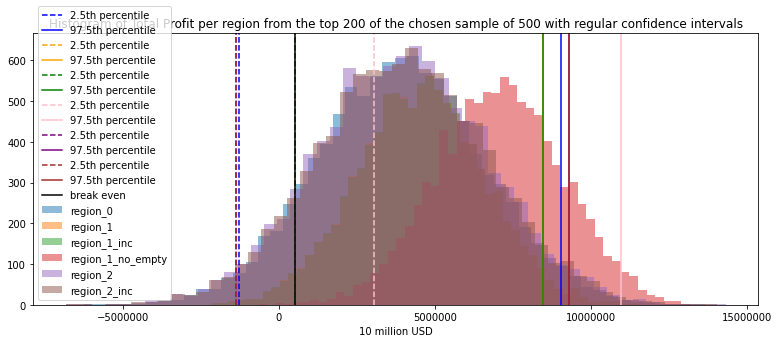

In [54]:
break_even_point = 100000000/200

plt.figure(figsize=(13,5))


plt.hist(profit_range_0, alpha=0.5, bins=50, label='region_0')
# Showing the related percentiles
plt.axvline(x=np.percentile(profit_range_0,[2.5]), ymin=0, ymax=1,label='2.5th percentile',ls='--',c='b')
plt.axvline(x=np.percentile(profit_range_0,[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='b')

plt.hist(profit_range_1, alpha=0.5, bins=50, label='region_1')
# Showing the related percentiles
plt.axvline(x=np.percentile(profit_range_1,[2.5]), ymin=0, ymax=1,label='2.5th percentile',ls='--',c='orange')
plt.axvline(x=np.percentile(profit_range_1,[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='orange')


plt.hist(profit_range_1_inc, alpha=0.5, bins=50, label='region_1_inc')
# Showing the related percentiles
plt.axvline(x=np.percentile(profit_range_1_inc,[2.5]), ymin=0, ymax=1,label='2.5th percentile',ls='--',c='green')
plt.axvline(x=np.percentile(profit_range_1_inc,[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='green')


plt.hist(profit_range_1_no_empty, alpha=0.5, bins=50, label='region_1_no_empty')
# Showing the related percentiles
plt.axvline(x=np.percentile(profit_range_1_no_empty,[2.5]), ymin=0, ymax=1,label='2.5th percentile',ls='--',c='pink')
plt.axvline(x=np.percentile(profit_range_1_no_empty,[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='pink')


plt.hist(profit_range_2, alpha=0.5, bins=50, label='region_2')
# Showing the related percentiles
plt.axvline(x=np.percentile(profit_range_2,[2.5]), ymin=0, ymax=1,label='2.5th percentile',ls='--',c='purple')
plt.axvline(x=np.percentile(profit_range_2,[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='purple')

plt.hist(profit_range_2_inc, alpha=0.5, bins=50, label='region_2_inc')
# Showing the related percentiles
plt.axvline(x=np.percentile(profit_range_2_inc,[2.5]), ymin=0, ymax=1,label='2.5th percentile',ls='--',c='brown')
plt.axvline(x=np.percentile(profit_range_2_inc,[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='brown')
plt.axvline(x = break_even_point, color = 'black', label = 'break even')
plt.ticklabel_format(style='plain')

plt.legend(loc='best')
plt.title('Histogram of Total Profit per region from the top 200 of the chosen sample of 500 with regular confidence intervals')
plt.xlabel('10 million USD');

### Conclusion:
The biggest part of the profit range for all 3 regions is above the break-even point. Still, region 1 in all its dataframe forms contains the most positive values. 

## Confidence interval and risks

I have chosen to use the break_even point to calculate my risk instead of 0.  I realize this is a more conservative way of thinking about the problem, but given the distributions of profit above, this is warranted.  

In [55]:
budget = 100000000
price_per_barrel = 4500

In [56]:
def results(profit_range):
    values=[]
    below_be = 0
    loss = 0

    for i in profit_range.tolist():
        if i <0:
            loss +=1
        if i < break_even_point:
            below_be +=1
        values.append(profit_range)
    
    lower = np.quantile(values,0.025)
    upper = np.quantile(values,0.975)
    average = np.mean(values)
    risk_be = below_be/len(profit_range)
    risk_loss = loss/len(profit_range)
    return  average, lower, upper, risk_be, risk_loss

In [57]:
average_0, lower_0, upper_0, risk_be_0, risk_loss_0 = results(profit_range_0)
average_1, lower_1, upper_1, risk_be_1, risk_loss_1 = results(profit_range_1)
average_1_inc, lower_1_inc, upper_1_inc, risk_be_1_inc, risk_loss_1_inc = results(profit_range_1_inc)
average_1_no_empty, lower_1_no_empty, upper_1_no_empty, risk_be_1_no_empty, risk_loss_1_no_empty = results(profit_range_1_no_empty)
average_2, lower_2, upper_2, risk_be_2, risk_loss_2 = results(profit_range_2)
average_2_inc, lower_2_inc, upper_2_inc, risk_be_2_inc, risk_loss_2_inc = results(profit_range_2_inc)

In [58]:
print('Region 0')
print('Average profit = USD {:.2f} '.format(average_0))
print('95% confidence interval from USD {:.2f} to {:.2f}'.format(lower_0, upper_0))
print('Percent Risk Loss {:.2%}'.format(risk_loss_0))
print('Percent Risk breakeven {:.2%}'.format(risk_be_0))

Region 0
Average profit = USD 3894075.10 
95% confidence interval from USD -1271295.94 to 9036523.89
Percent Risk Loss 6.74%
Percent Risk breakeven 9.72%


In [59]:
print('Region 1')
print('Average profit = USD {:.2f} '.format(average_1))
print('95% confidence interval from USD {:.2f} to {:.2f}'.format(lower_1, upper_1))
print('Percent Risk Loss {:.2%}'.format(risk_loss_1))
print('Percent Risk breakeven {:.2%}'.format(risk_be_1))

Region 1
Average profit = USD 4522350.43 
95% confidence interval from USD 510389.78 to 8458642.11
Percent Risk Loss 1.31%
Percent Risk breakeven 2.49%


In [60]:
print('Region 1 without irrelevant features')
print('Average profit = USD {:.2f} '.format(average_1_inc))
print('95% confidence interval from USD {:.2f} to {:.2f}'.format(lower_1_inc, upper_1_inc))
print('Percent Risk Loss {:.2%}'.format(risk_loss_1_inc))
print('Percent Risk breakeven {:.2%}'.format(risk_be_1_inc))

Region 1 without irrelevant features
Average profit = USD 4521901.22 
95% confidence interval from USD 502956.90 to 8451971.18
Percent Risk Loss 1.31%
Percent Risk breakeven 2.50%


In [61]:
print('Region 1 without empty wells')
print('Average profit = USD {:.2f} '.format(average_1_no_empty))
print('95% confidence interval from USD {:.2f} to {:.2f}'.format(lower_1_no_empty, upper_1_no_empty))
print('Percent Risk Loss {:.2%}'.format(risk_loss_1_no_empty))
print('Percent Risk breakeven {:.2%}'.format(risk_be_1_no_empty))

Region 1 without empty wells
Average profit = USD 7048492.84 
95% confidence interval from USD 3043166.99 to 10962807.39
Percent Risk Loss 0.03%
Percent Risk breakeven 0.10%


In [62]:
print('Region 2')
print('Average profit = USD {:.2f} '.format(average_2))
print('95% confidence interval from USD {:.2f} to {:.2f}'.format(lower_2, upper_2))
print('Percent Risk Loss {:.2%}'.format(risk_loss_2))
print('Percent Risk breakeven {:.2%}'.format(risk_be_2))

Region 2
Average profit = USD 3937109.17 
95% confidence interval from USD -1371812.89 to 9296999.74
Percent Risk Loss 7.43%
Percent Risk breakeven 10.02%


In [63]:
print('Region 2 without irrelevant features')
print('Average profit = USD {:.2f} '.format(average_2_inc))
print('95% confidence interval from USD {:.2f} to {:.2f}'.format(lower_2_inc, upper_2_inc))
print('Percent Risk Loss {:.2%}'.format(risk_loss_2_inc))
print('Percent Risk breakeven {:.2%}'.format(risk_be_2_inc))

Region 2 without irrelevant features
Average profit = USD 3941694.87 
95% confidence interval from USD -1367785.34 to 9279458.17
Percent Risk Loss 7.38%
Percent Risk breakeven 10.20%


# Conclusion
In this part, I will be conservative enough to discard any region whose confidence interval includes 0.  So I choose region 1.

In reality, OilGiant prefers a region with risk as low as  2.5\% or lower. To do so, I compared the profit of each region to the breakeven set by the company.  If the well was above below breakeven, I kept it in a separate category call below breakeven.  I I realize that was a very conservative choice, but given that we had several good enough options, I wanted the best option possible. I estimated the 95% confidence interval (CI) that the profit will fall into a particular range. Then we calculated the risk of losses for each region.

Both types of risks for regions 0 and 2 are much higher than the excepted 2.5\%.  But for region 1, both types of risks are within the appetite of the company.  Not only the selected region has a wells with higher oil reserves, it is also less risky than other regions and meets the breakeven point faster. 